In [5]:
import warnings 
warnings.filterwarnings('ignore')

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Approval Rating
http://open.163.com/newview/movie/free?pid=M82IC6GQU&mid=M83JD9CGI

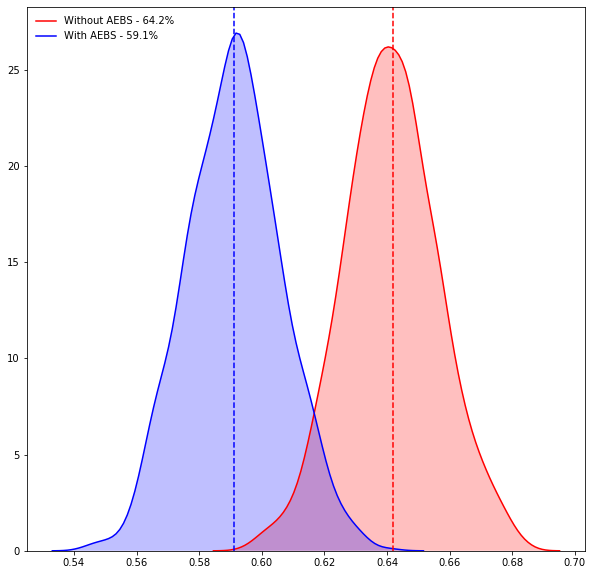

In [295]:
m = 1000; p1 = 642/1000; std_1 = (p1*(1-p1)/m)**0.5 #std_1 std of sampling distribution
n = 1000; p2 = 591/1000; std_2 = (p2*(1-p2)/n)**0.5 #std_2 std of sampling distribution
diff = p1-p2; std_3 = (std_1/m+std_2/n)**0.5

np.random.seed(0) 
Gaussian_1=np.random.normal(p1,std_1,1000)
Gaussian_2=np.random.normal(p2,std_2,1000)
Gaussian_3=np.random.normal(diff,std_3,1000)

plt.figure(figsize=(10, 10))
sns.kdeplot(Gaussian_1,shade=True,color='r',label='Without AEBS - 64.2%')
sns.kdeplot(Gaussian_2,shade=True,color='b',label='With AEBS - 59.1%')
plt.axvline(p1,color="r", linestyle="--")
plt.axvline(p2,color="b", linestyle="--")
plt.legend(loc='upper left',framealpha=1, frameon=False)

plt.show()

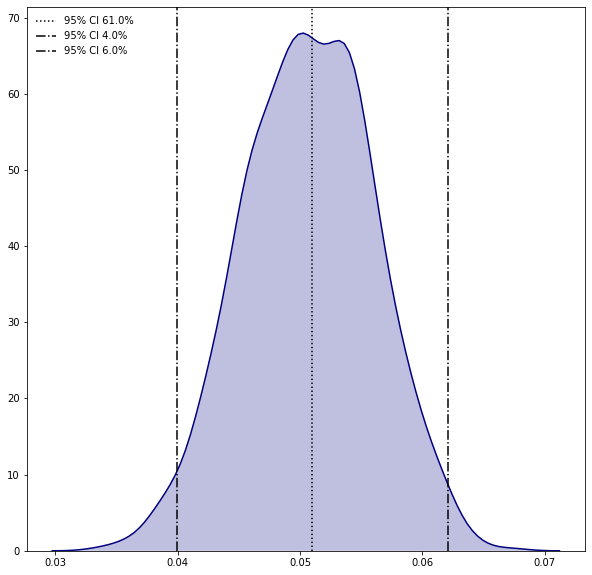

In [299]:
plt.figure(figsize=(10, 10))
sns.kdeplot(Gaussian_3,shade=True,color='navy')
plt.axvline(diff,color="black", linestyle=":",label=label1)
label2 = '95% CI ' + str(round(diff - 2*std_3,2)*100)+'%'
plt.axvline(diff - 2*std_3, color="black", linestyle="-.",label=label2)
label3 = '95% CI ' + str(round(diff + 2*std_3,2)*100)+'%'
plt.axvline(diff + 2*std_3, color="black", linestyle="-.",label=label3)

plt.legend(loc='upper left',framealpha=1, frameon=False)

# Amazon Reviews

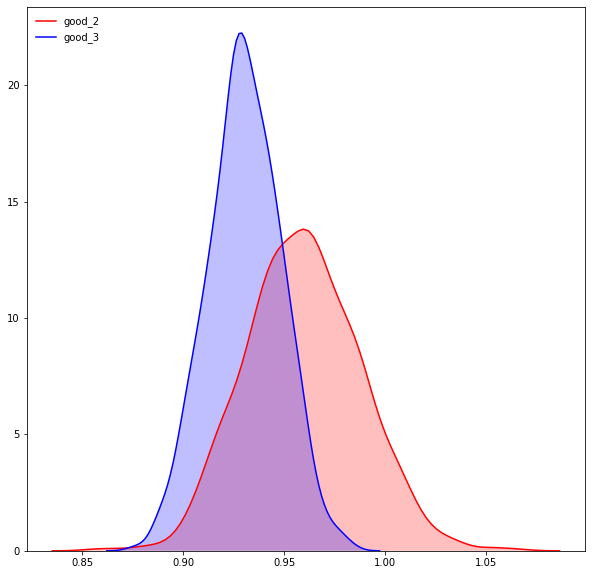

In [300]:
# good_1 = 10; total_1 = 10; r1 = good_1/total_1;std_1 = (r1*(1-r1)/total_1)**0.5
good_2 = 48; total_2 = 50; r2 = good_2/total_2;std_2 = (r2*(1-r2)/total_2)**0.5
good_3 = 186; total_3 = 200; r3 = good_3/total_3;std_3 = (r3*(1-r3)/total_3)**0.5

# norm_1 = np.random.normal(r1,std_1,1000)
norm_2 = np.random.normal(r2,std_2,1000)
norm_3 = np.random.normal(r3,std_3,1000)

plt.figure(figsize=(10, 10))
# sns.kdeplot(norm_1,shade=True,color='r',label='good_1')
sns.kdeplot(norm_2,shade=True,color='r',label='good_2')
sns.kdeplot(norm_3,shade=True,color='b',label='good_3')
plt.legend(loc='upper left',framealpha=1, frameon=False)
plt.show()

## Laplace Rule of Succession

1. https://www.bilibili.com/video/BV1Bz411b7Jy
2. http://varianceexplained.org/about/

`guideline`
- How exactly are we modeling the situation? 应该如何为这种情况建模
- what exactly is that you want to optimize? 你到底想要优化什么

In [46]:
good_1 = 10; total_1 = 10; r1 = (good_1+1)/(total_1+2); std_1 = (r1*(1-r1)/total_1)**0.5
good_2 = 48; total_2 = 50; r2 = (good_2+1)/(total_2+2); std_2 = (r2*(1-r2)/total_2)**0.5
good_3 = 186; total_3 = 200; r3 = (good_3+1)/(total_3+2); std_3 = (r3*(1-r3)/total_3)**0.5

## A Bayesian view of Amazon Resellers
1. https://www.johndcook.com/blog/2011/09/27/bayesian-amazon/
2. https://www.datalearner.com/blog/1051505532393058

In [303]:
r1 = 0.94; total_1 = 85193
r2 = 0.98; total_2 = 20785
r3 = 0.99; total_3 = 840

In [304]:
import math
beta_dis_1 = np.random.beta(math.floor(r1*total_1)+1,total_1-math.floor(r1*total_1)+1,1000)
beta_dis_2 = np.random.beta(math.floor(r2*total_2)+1,total_2-math.floor(r2*total_2)+1,1000)
beta_dis_3 = np.random.beta(math.floor(r3*total_3)+1,total_3-math.floor(r3*total_3)+1,1000)

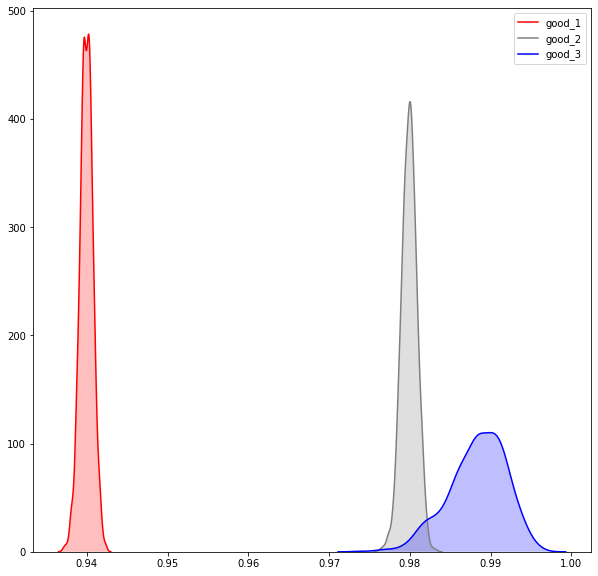

In [305]:
plt.figure(figsize=(10, 10))
sns.kdeplot(beta_dis_1,shade=True,color='r',label='good_1')
sns.kdeplot(beta_dis_2,shade=True,color='gray',label='good_2')
sns.kdeplot(beta_dis_3,shade=True,color='b',label='good_3')

# Estimating Uncertainty

In [215]:
X = pd.DataFrame(np.random.randint(0,100,size=10000),columns=['random_var'])
sample_mean = []
for i in range(1000):
    sample_mean.append(X.sample(100).random_var.mean())

Text(0.5, 1.0, 'Population Distribution')

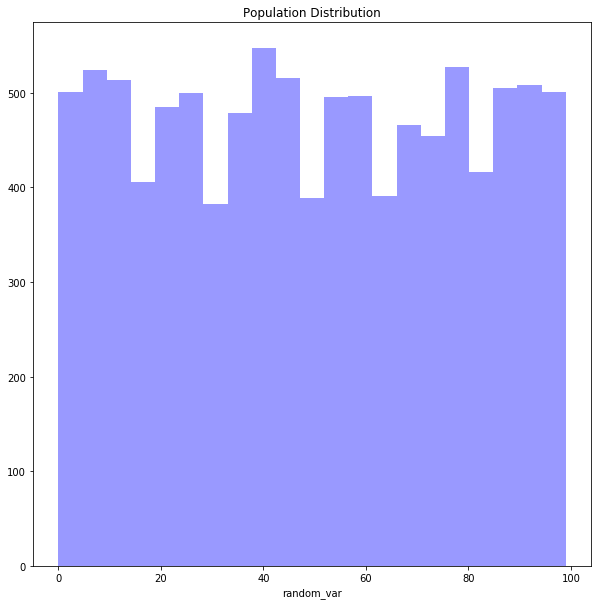

In [232]:
plt.figure(figsize=(10, 10))
sns.distplot(X['random_var'],kde=False,color="b")
plt.title("Population Distribution")

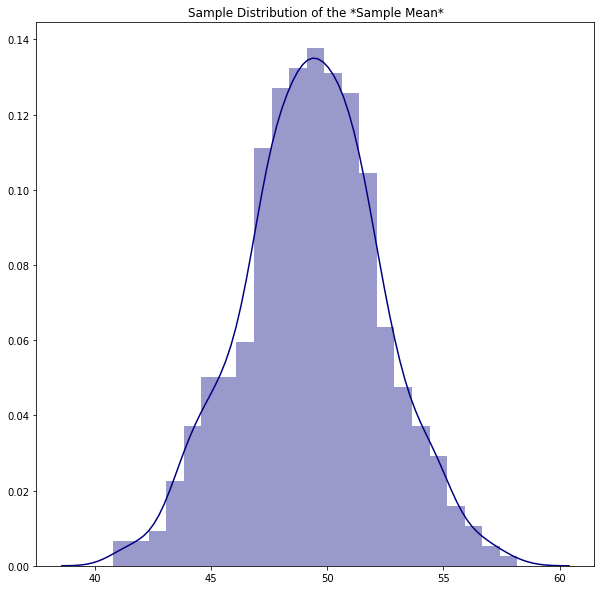

In [235]:
plt.figure(figsize=(10, 10))
plt.title("Sample Distribution of the *Sample Mean*")
sns.distplot(sample_mean,color="navy")

Text(0.5, 1.0, '68-95-99.7 Rules')

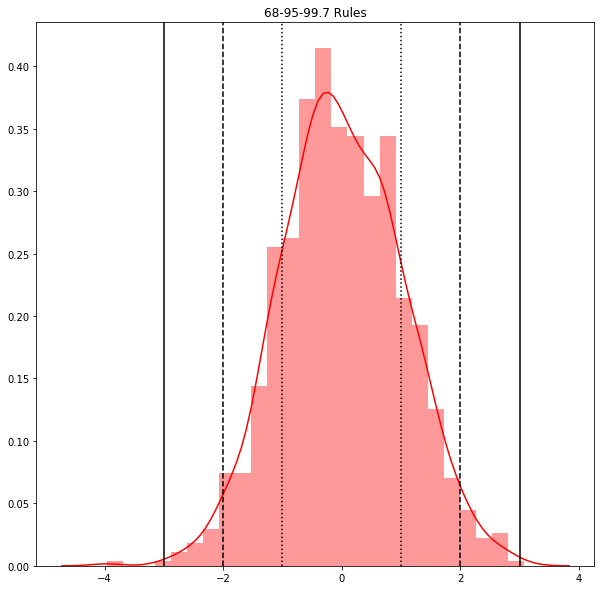

In [243]:
plt.figure(figsize=(10, 10))
Gaussian=np.random.normal(0,1,1000)
sns.distplot(Gaussian,color="r")

plt.axvline(1,color="black", linestyle=":")
plt.axvline(-1,color="black", linestyle=":")

plt.axvline(2,color="black", linestyle="--")
plt.axvline(-2,color="black", linestyle="--")

plt.axvline(3,color="black", linestyle="-")
plt.axvline(-3,color="black", linestyle="-")

plt.title("68-95-99.7 Rules")

In [306]:
m = 1000; p1 = 642/1000; std_1 = (p1*(1-p1)/m)**0.5
n = 1000; p2 = 591/1000; std_2 = (p2*(1-p2)/n)**0.5
diff = p1-p2; std_3 = (p1*(1-p1)/m+p2*(1-p2)/n)**0.5


In [308]:
z_score = diff/std_3
from scipy import stats
(1-stats.norm.cdf(diff,0,std_3))*100

0.9422761188373152

Text(0.5, 1.0, 'The Proba. getting such difference -- 0.94%')

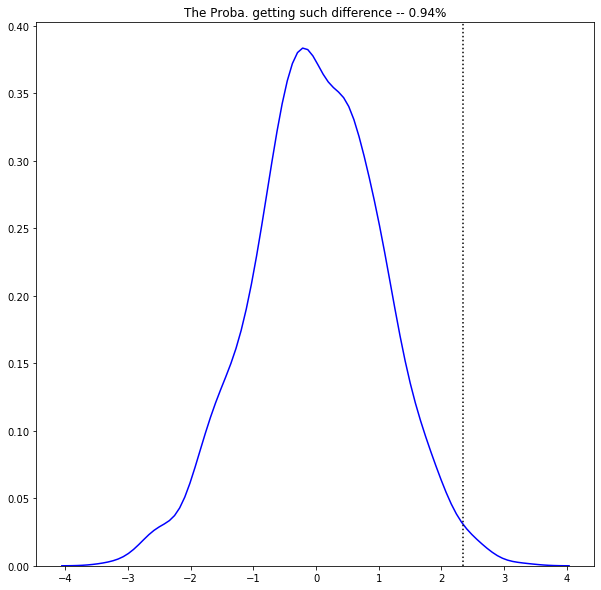

In [309]:
plt.figure(figsize=(10, 10))
Gaussian=np.random.normal(0,1,1000)
sns.kdeplot(Gaussian,color="b")
plt.axvline(diff/std_3,color="black", linestyle=":")
plt.title("The Proba. getting such difference -- 0.94%")